In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
number_of_images = []
#load images
def load_images_from_folder(folders):
    images = []
    count = 0
    for folder in folders:
        for filename in os.listdir(folder):
            img = cv2.imread(os.path.join(folder,filename))
            b,g,r = cv2.split(img)       # get b,g,r
            img = cv2.merge([r,g,b])     # switch it to rgb
            if img is not None:
                img = cv2.resize(img,(299,299))
                images.append(img)
                count = count + 1
        number_of_images.append(count) #นับว่าแต่ละ directory มีกี่รูป
        count = 0
    return images

In [3]:
folder_names = [
    './training/training/n0',
    './training/training/n1',
    './training/training/n2',
    './training/training/n3',
    './training/training/n4',
    './training/training/n5',
    './training/training/n6',
    './training/training/n7',
    './training/training/n8',
    './training/training/n9'
]
training_data = load_images_from_folder(folder_names)

In [4]:
#เตรียม output
def defined_output(number_of_images):
    label = []
    for count,num in enumerate(number_of_images):
        for i in range(num):
            classes = len(number_of_images)
            output = np.zeros((classes,), dtype=int)
            output[count] = 1
            label.append(output)
    return label

In [5]:
y = defined_output(number_of_images)
y = np.array(y)
print(y)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [6]:
number_of_images = []
folder_names = [
    './validation/validation/n0',
    './validation/validation/n1',
    './validation/validation/n2',
    './validation/validation/n3',
    './validation/validation/n4',
    './validation/validation/n5',
    './validation/validation/n6',
    './validation/validation/n7',
    './validation/validation/n8',
    './validation/validation/n9'
]
validation_data = load_images_from_folder(folder_names)

In [7]:
y_val = defined_output(number_of_images)
y_val = np.array(y_val)
print(y_val)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [8]:
training_data = np.array(training_data)
training_data = tf.keras.applications.inception_v3.preprocess_input(
    training_data, data_format=None
)
validation_data = np.array(validation_data)
validation_data = tf.keras.applications.inception_v3.preprocess_input(
    validation_data , data_format=None
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


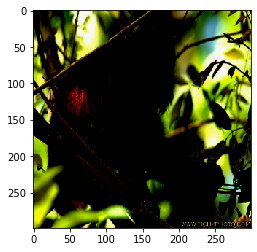

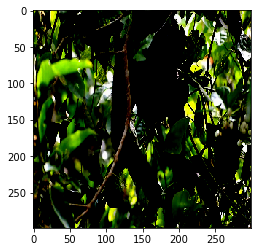

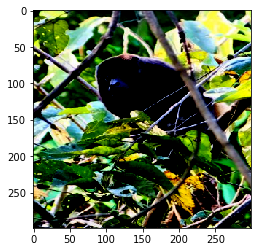

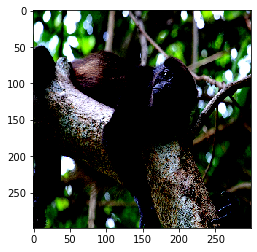

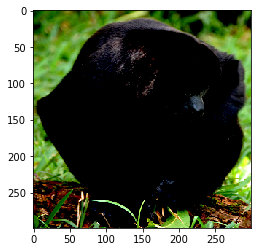

In [9]:
for i in range(5):
    plt.figure()
    plt.imshow(training_data[i])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_data, y, test_size=0.3, random_state=42)

In [11]:
INPUT_SHAPE = (299,299,3)

base_model = tf.keras.applications.InceptionV3(
    include_top=False, 
    weights='imagenet', 
    input_shape=INPUT_SHAPE
)

base_model.trainable = False

In [12]:
inputs = tf.keras.Input(shape=(299, 299, 3))
X = base_model(inputs, training=False)
X = tf.keras.layers.GlobalAveragePooling2D()(X)
X = tf.keras.layers.Dropout(0.2)(X)
outputs = tf.keras.layers.Dense(10,activation='softmax')(X)
model = tf.keras.Model(inputs, outputs)

In [13]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 21,823,274
Trainable params: 20,490
Non-trainable params: 21,802,784
_________________________________________________________________


In [15]:
history = model.fit(X_train,y_train,validation_data=(validation_data,y_val),epochs=10)

Epoch 1/10
24/24 [==============================] - 53s 2s/step - loss: 2.2007 - accuracy: 0.2422 - val_loss: 1.9967 - val_accuracy: 0.4412
Epoch 2/10
24/24 [==============================] - 54s 2s/step - loss: 1.8772 - accuracy: 0.5130 - val_loss: 1.7172 - val_accuracy: 0.7169
Epoch 3/10
24/24 [==============================] - 53s 2s/step - loss: 1.6152 - accuracy: 0.6823 - val_loss: 1.4727 - val_accuracy: 0.8713
Epoch 4/10
24/24 [==============================] - 52s 2s/step - loss: 1.3839 - accuracy: 0.8424 - val_loss: 1.2639 - val_accuracy: 0.9301
Epoch 5/10
24/24 [==============================] - 51s 2s/step - loss: 1.1900 - accuracy: 0.9010 - val_loss: 1.0855 - val_accuracy: 0.9596
Epoch 6/10
24/24 [==============================] - 51s 2s/step - loss: 1.0237 - accuracy: 0.9362 - val_loss: 0.9350 - val_accuracy: 0.9743
Epoch 7/10
24/24 [==============================] - 52s 2s/step - loss: 0.8743 - accuracy: 0.9583 - val_loss: 0.8128 - val_accuracy: 0.9743
Epoch 8/10
24/24 [==

In [16]:
model.evaluate(X_test,y_test)

11/11 [==============================] - 15s 1s/step - loss: 0.5810 - accuracy: 0.9788


[0.5809733271598816, 0.978787899017334]

In [17]:
base_model.trainable = True

In [18]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  311


In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate/10),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [20]:
history_fine = model.fit(X_train,y_train,validation_data=(validation_data,y_val),epochs=20,initial_epoch=history.epoch[-1])

Epoch 10/20
24/24 [==============================] - 136s 6s/step - loss: 0.2386 - accuracy: 0.9844 - val_loss: 0.0807 - val_accuracy: 0.9890
Epoch 11/20
24/24 [==============================] - 134s 6s/step - loss: 0.0194 - accuracy: 1.0000 - val_loss: 0.0379 - val_accuracy: 0.9853
Epoch 12/20
24/24 [==============================] - 133s 6s/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0306 - val_accuracy: 0.9926
Epoch 13/20
24/24 [==============================] - 133s 6s/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0285 - val_accuracy: 0.9926
Epoch 14/20
24/24 [==============================] - 133s 6s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0255 - val_accuracy: 0.9926
Epoch 15/20
24/24 [==============================] - 136s 6s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0270 - val_accuracy: 0.9890
Epoch 16/20
24/24 [==============================] - 134s 6s/step - loss: 7.4824e-04 - accuracy: 1.0000 - val_loss: 0.0248 - val_accuracy: 0.9890
Ep

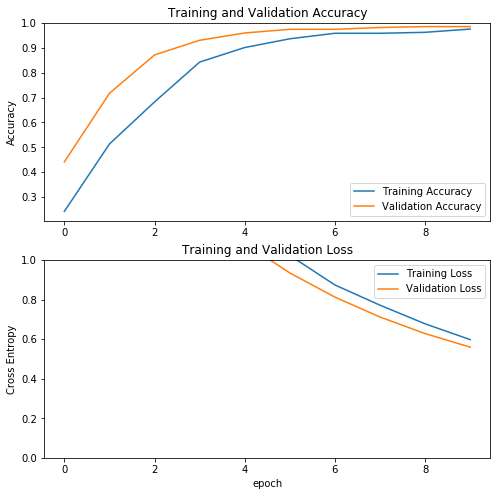

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [22]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

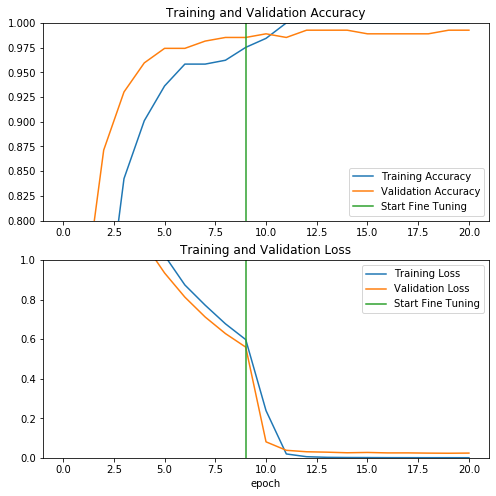

In [23]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([10-1,10-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([10-1,10-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [24]:
model.evaluate(X_test,y_test)

11/11 [==============================] - 15s 1s/step - loss: 0.0197 - accuracy: 0.9939


[0.01970447413623333, 0.9939393997192383]

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import f1_score

In [27]:
new_y_pred = []
for i in y_pred:
    new_y_pred.append(np.argmax(i))

new_y_test = []
for i in y_test:
    new_y_test.append(np.argmax(i))

In [28]:
f1_score(new_y_test,new_y_pred, average='micro')

0.9939393939393939

In [29]:
from sklearn.metrics import classification_report

print(classification_report(new_y_test,new_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        37
           5       1.00      1.00      1.00        31
           6       1.00      1.00      1.00        39
           7       1.00      0.97      0.98        32
           8       0.93      1.00      0.97        28
           9       1.00      1.00      1.00        24

    accuracy                           0.99       330
   macro avg       0.99      0.99      0.99       330
weighted avg       0.99      0.99      0.99       330

